# cold/hot years

# imports and defs

In [2]:
import utility_module_2_v_3 as uu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.matlib as ml

In [3]:
path_imd='/media/vikram/subimal/Raw_Data/IMD_DATA/'
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/'

path_out = '/home/vikram/BCSD_data/' + 'India_P_BCSDd/'


# Read IMD  data

## Read data

In [23]:
data_bounds=[65, 40, 100, 5]
st=1951
en=2005
yr_split = 1951
 
data_imd_Tmax,lat_obs,lon_obs=uu.extract_imd_temp(st,en,path_imd+'max_temp_pt1/max_temp_',data_bounds)
data_imd_Tmin,lat_obs,lon_obs=uu.extract_imd_temp(st,en,path_imd+'min_temp_pt1/min_temp_',data_bounds)


Monthly data dimensions: (660, 31, 31)


/home/vikram/Dropbox/BCSD Work/07_BCSD_India_salvi/utility_module_2_v_3.py:259: RuntimeWarning: Mean of empty slice
  data_monthly[itex,:,:]=np.nanmean(data_daily[year_index+ind_months[month_iter]:year_index+ind_months[month_iter+1],:,:],axis=0)


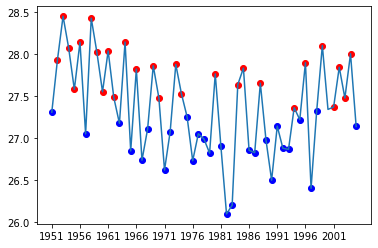

In [51]:

data_imd_Tavg = (data_imd_Tmax+data_imd_Tmin)*0.5
# mask=np.all(m,axis=0)
data_monthly = uu.daily_to_monthly_sts(data_imd_Tavg,st,en,method='MEAN')
data_annual = np.mean(np.reshape(data_monthly,(12,-1,31,31),order = 'F')[2:5],axis=0)
annual_ts = np.nanmean(data_annual,axis=(1,2))
# data_annual.shape
plt.plot(annual_ts)
# data_annual[0,:,:]

# plt.plot(np.sort(annual_ts))
min_years=np.argsort(annual_ts)[:27]
max_years=np.argsort(-annual_ts)[:27]


plt.scatter(min_years,annual_ts[min_years],color= 'b')
plt.scatter(max_years,annual_ts[max_years],color= 'r')
plt.xticks(range(0,en-st+1,5),range(st,en+1,5))


max_year_list = max_years + st 
min_year_list = min_years + st 
min_year_list
np.savez('./cold_warm_years',cold_years = min_year_list,warm_years = max_year_list)

In [ ]:
'/media/vikram/subimal/Raw_Data/IMD_DATA/max_temp_pt1/max_temp_1954.grd
'/media/vikram/subimal/Raw_Data/IMD_DATA//max_temp_pt1/max_temp_1901.grd